In [ ]:
!curl -O -L https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data 
!curl -O -L https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25936  100 25936    0     0  38768      0 --:--:-- --:--:-- --:--:-- 38710
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4747  100  4747    0     0   8839      0 --:--:-- --:--:-- --:--:--  8839


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
df = pd.read_csv("imports-85.data", header=None, usecols=[0,1,9,10,11,12,13,16,19,20,21,22,23,24,25])

In [20]:
dataset_raw = []
for index, row in df.iterrows():
  data = []
  clean = True
  for col in row: 
    if (col == '?'):
      clean = False
      break
    data.append(col)
  if clean:
    dataset_raw.append(data)

print(len(data))
print(len(dataset_raw))

15
160


In [21]:
def normalise(data):
  for i in range(0, data.shape[1]-1):
    max = data[:, i].max()
    min = data[:, i].min()
    data[:, i] = (data[:, i] - min)/(max - min) 
  return data

In [23]:
dataset_raw = np.array(dataset_raw).astype(np.float32)
np.random.shuffle(dataset_raw)
dataset_raw = normalise(dataset_raw)

# MIN_VAL = dataset_raw[:, -1].min()
# MAX_VAL = dataset_raw[:, -1].max()
TRAIN_SPLIT = int(0.8*dataset_raw.shape[0])

X_train = dataset_raw[:TRAIN_SPLIT, :-1]
Y_train = dataset_raw[:TRAIN_SPLIT, -1]

X_test = dataset_raw[TRAIN_SPLIT:, :-1]
Y_test = dataset_raw[TRAIN_SPLIT:, -1]
print(Y_train.shape[0], Y_test.shape[0])

128 32
<class 'numpy.ndarray'>


In [6]:
class KNN_Model:
  def __init__(self, X, Y): 
    self.X = X
    self.Y = Y
    # self.w = np.ones((1, X.shape[1]), np.float32)

  def predict(self, X_test, K):
    d = (self.X - X_test)**2
    d = d.sum(axis=1)**0.5
    idx = d.argsort()[:K]
    # print(self.Y[idx])
    # print(d[idx])
    pred = (self.Y[idx]*d[idx]).sum()/(d[idx].sum() + 1e-7)
    return pred

In [7]:
def RMSE_Loss(pred, Y_test):
  size = pred.shape[0]
  # print(size)
  # print((pred - Y_test)**2)
  loss = ((pred-Y_test)**2).sum()/(1.0*size)
  return loss**0.5

In [8]:
def evaluate(model, K):
  Y_pred = []
  for i in range(X_test.shape[0]):
    pred = model.predict(X_test[i], K)
    Y_pred.append(pred)
  Y_pred = np.array(Y_pred)
  # print(Y_pred.astype(int))
  # print(Y_test)
  loss = RMSE_Loss(Y_pred, Y_test)
  return loss

In [9]:
model = KNN_Model(X_train, Y_train)
print(model.predict(X_test[0], 3), Y_test[0])

15825.529537494323 15580.0


In [10]:
print(evaluate(model, 2))

3514.598326802676


1 3712.1549735820154
2 3514.598326802676
3 3445.8221262464035
4 3566.9378840577706
5 3630.4625222710674
6 3923.357364667189
7 4076.6263362421237
8 3861.908711794873
9 4056.335826032472
10 4079.331189591185
11 4162.761446632629
12 4263.62357976687
13 4302.283211453889
14 4291.755201946504


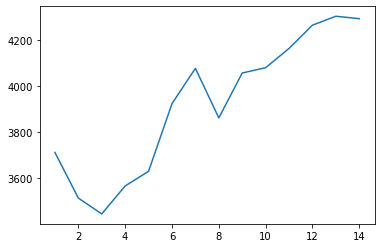

In [11]:
loss = []
K_MAX = 15
for k in range(1, K_MAX):
  l = evaluate(model, k)
  print(k, l)
  loss.append(l)
plt.plot(range(1, K_MAX), loss)
